In [9]:
import numpy as np
import scipy
import astropy.io.fits as pyfits 

class ReadCatData:
    def __init__(self,catalogue):
        try: 
            tab = pyfits.getdata(catalogue)
            self.fl = tab.field('FLUX_APER').transpose()[0]
            self.fl_err = tab.field('FLUXERR_APER').transpose()[0]
            self.fl = tab.field('FLUX_APER').transpose()[0]
            self.fl_err = tab.field('FLUXERR_APER').transpose()[0]
            
            self.aper = tab.field('MAG_APER').transpose()[0]
            self.aper_err = tab.field('MAGERR_APER').transpose()[0]
            self.flags = tab.field('FLAGS')
            self.imaflags = tab.field('IMAFLAGS_ISO')
            self.fr = tab.field('FLUX_RADIUS').transpose()[1]
            self.auto = tab.field('MAG_AUTO')
            self.autoerr = tab.field('MAGERR_AUTO')
        except IOError as (errno, strerror):
            print "Cannot read {0} : ({1}): {2}".format(catalogue, errno, strerror)
            

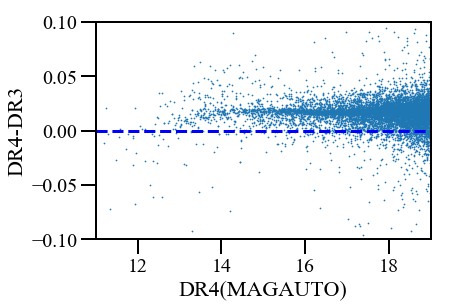

In [10]:
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
d4_magauto=np.loadtxt('D4.dat',unpack=True)
d3_magauto=np.loadtxt('DR3_inD4.dat',unpack=True)
resid = d4_magauto - d3_magauto 
ax=fig.add_subplot(1,1,1)
ax.set_xlim(11,19)
ax.set_ylim(-0.1,0.1)
ax.axhline(linewidth=3, ls='--', color='b')
ax.set_ylabel('DR4-DR3')
ax.set_xlabel('DR4(MAGAUTO)')
ax.scatter(d4_magauto,resid,0.5)
plt.savefig('DR3vsDR4Ks.pdf')

In [4]:

import astropy.io.fits as pyfits 
class ReadCatData:
    def __init__(self,catalogue):
        try: 
            tab = pyfits.getdata(catalogue)
            self.auto = tab.field('MAG_AUTO')
            self.autoerr = tab.field('MAGERR_AUTO')
            self.aper = tab.field('MAG_AUTO')
            self.apererr = tab.field('MAGERR_AUTO')
            self.x = tab.field("X_IMAGE")
            self.y = tab.field("Y_IMAGE")
            self.sg = tab.field("CLASS_STAR")
        except IOError as (errno, strerror):
            print "Cannot read {0} : ({1}): {2}".format(catalogue, errno, strerror)
            
wircam = ReadCatData("COSMOS_in_WIRCAM_Ks.cat")
uvista = ReadCatData("COSMOS_in_UVISTA_Ks-detectionWIRCAM.cat")


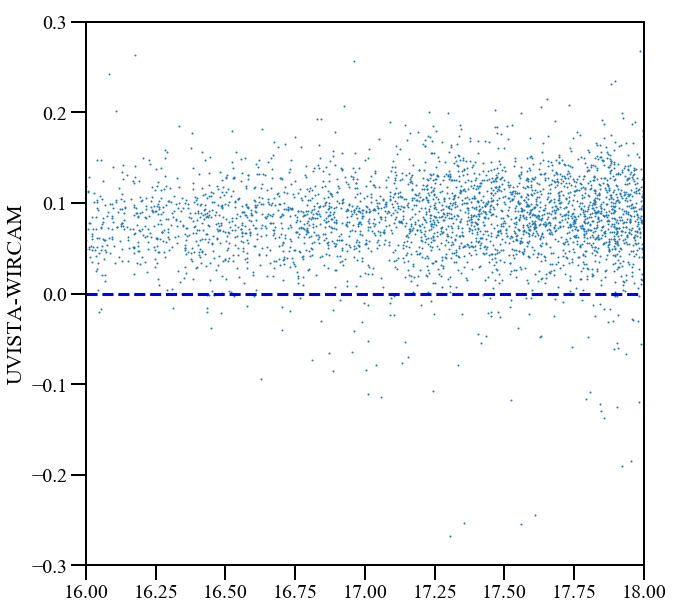

In [5]:
import matplotlib.pyplot as plt
diff = uvista.aper-wircam.aper
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_xlim(16,18)
ax.set_ylim(-0.3,0.3)
plt.ylabel("UVISTA-WIRCAM")
ax.axhline(linewidth=3, ls='--', color='b')
ax.scatter(uvista.auto,diff,s=1)
plt.savefig('test.pdf')


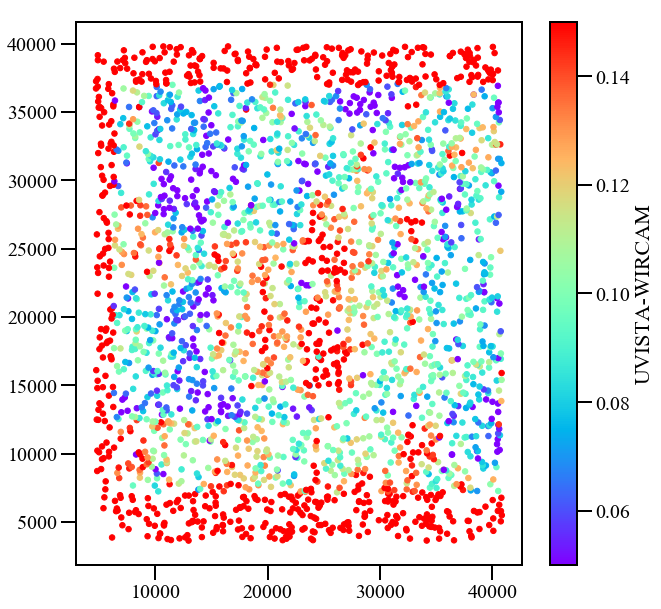

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import cm
flag = (wircam.auto > 16) & (wircam.auto < 18) & (wircam.sg > 0.8)
xco = wircam.x[flag]-np.min(wircam.x[flag])
yco = wircam.y[flag]-np.min(wircam.y[flag])
diff = uvista.aper-wircam.aper
fig=plt.figure(figsize=(10,10))
heatmap, xedges, yedges = np.histogram2d(xco, yco, bins=50)
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(wircam.x[flag],wircam.y[flag],s=30,c=diff[flag],vmin=0.05,vmax=0.15,cmap=cm.rainbow)
colorbar=fig.colorbar(scatter,ax=ax)
colorbar.set_label('UVISTA-WIRCAM')
plt.savefig('comparisons-with-wircam.png')

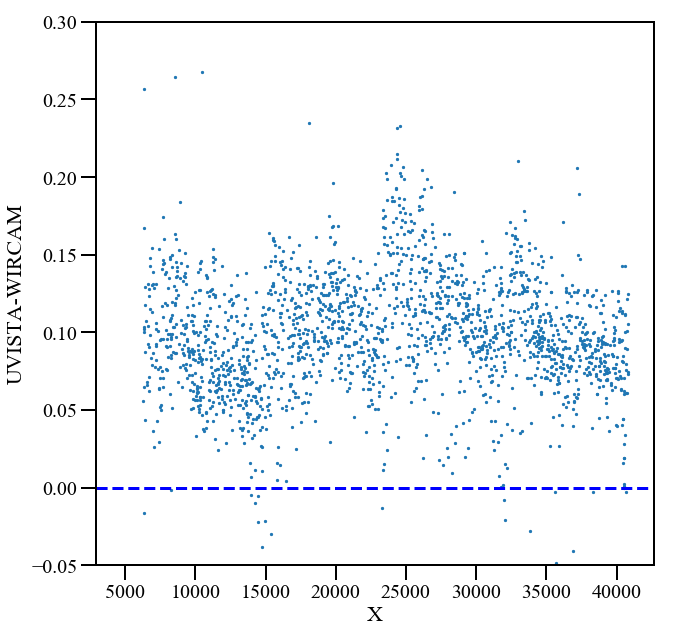

In [101]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import cm
fig=plt.figure(figsize=(10,10))
flag = (wircam.auto > 16) & (wircam.auto < 18) & (wircam.sg > 0.9)
xco = wircam.x[flag]-np.min(wircam.x[flag])
yco = wircam.y[flag]-np.min(wircam.y[flag])
diff = uvista.aper-wircam.aper
heatmap, xedges, yedges = np.histogram2d(xco, yco, bins=50)
ax=fig.add_subplot(1,1,1)
#ax.set_xlim(16,18)
ax.set_ylim(-0.05,0.3)
ax.axhline(linewidth=3, ls='--', color='b')
ax.scatter(wircam.x[flag],diff[flag],s=5)
plt.ylabel("UVISTA-WIRCAM")
plt.xlabel("X (pixels)")
plt.savefig('test.pdf')

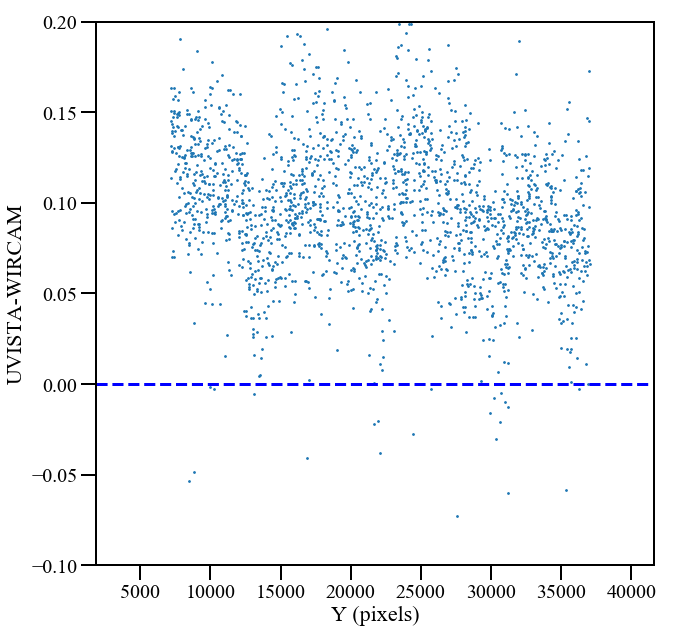

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import cm
fig=plt.figure(figsize=(10,10))
flag = (wircam.auto > 16) & (wircam.auto < 18) & (wircam.sg > 0.9)
xco = wircam.x[flag]-np.min(wircam.x[flag])
yco = wircam.y[flag]-np.min(wircam.y[flag])
diff = uvista.aper-wircam.aper
heatmap, xedges, yedges = np.histogram2d(xco, yco, bins=50)
ax=fig.add_subplot(1,1,1)
#ax.set_xlim(16,18)
ax.set_ylim(-0.1,0.2)
ax.axhline(linewidth=3, ls='--', color='b')
ax.scatter(wircam.y[flag],diff[flag],s=3)
plt.ylabel("UVISTA-WIRCAM")
plt.xlabel("Y (pixels)")

plt.savefig('test.pdf')